# Week12 Deep Learning and TensorFlow

# 0. "Defined-and-Run" vs "Defined-by-Run" 
## Defined-and-Run
- Network(or computational graph) is defined and fixed.
- And then mini-batch data are fed into the predefined network.
- TensorFlow, Caffe, torch.nn, and Theano-based frameworks

![Defined-and-Run](https://miro.medium.com/max/1200/1*0hPW23F_Y_TsQBH8PlLpMA.gif)

## Defined-by-Run
- Network is defined dynamically via the actual forward computation.
- This dynamic definition allows conditionals and loops into the network definitions easily.  
- Chainer, PyTorch

![Defined-and-Run](https://miro.medium.com/max/1200/1*m0qTLzOz-xMCdJEmcH6-pA.gif)

- https://medium.com/@zzemb6/define-and-run-vs-define-by-run-b527d127e13a

# 1. Tensorflow Basic with Session(Non-eager API, v1.x)
- Defined-and-Run
- Define computational graph, and run the session, feeding the data into graph

### Import TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # Run the tensorflow like v1.x

Instructions for updating:
non-resource variables are not supported in the long term


### Constant
fixed value tensor, not trainable


In [2]:
hello = tf.constant("Hello, Tensorflow!")

sess = tf.Session()
print(sess.run(hello))

b'Hello, Tensorflow!'


In [3]:
a = tf.constant(3)
b = tf.constant(5)

# launch the graph
sess = tf.Session()
print(sess.run(a+b))

8


In [4]:
# constants
mat_1 = tf.constant([[1,2],[3,4]])
mat_2 = tf.constant([[1,1],[1,1]])

# define operations
mat_product = tf.matmul(mat_1,mat_2)

# launch the graph
with tf.Session() as sess:
    print(sess.run(mat_product))

[[3 3]
 [7 7]]


### Placeholder & Operations
- **Placeholder** : tensors of values that are unknown during the graph construction, but passed as input during a session
- **Operations** : functions on tensors

In [5]:
# placeholders
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)

# operations
add = tf.add(a,b)
mul = tf.multiply(a,b)

# launch the graphs
with tf.Session() as sess:
    print(sess.run(add,feed_dict={a:3,b:5})) # Feeding input data into placeholder
    print(sess.run(mul, feed_dict={a:3, b:5}))

8
15


### Example : Linear Regression with Tensorflow(Non-eager API)

### Load the Birth-Life Dataset

In [6]:
import pandas as pd

path_to_file = tf.keras.utils.get_file('birth_life_2010.txt', 'https://github.com/uzay00/KaVe/raw/master/2018/Lecture9/tf%20code/birth_life_2010.txt')
data = pd.read_csv(path_to_file, sep="\t")
data.head()


,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [7]:
birth_rate = data["Birth rate"].values
life_exp = data["Life expectancy"].values

data = list(zip(birth_rate, life_exp))
data = np.asarray(data, dtype=np.float32)

data.shape

(190, 2)

### Build the model
- **Variables** : tensors initialized in a session - trainable

In [8]:
# placeholders
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# variables 
w = tf.get_variable("weights", initializer=tf.constant(0.0))
b = tf.get_variable("bias", initializer=tf.constant(0.0))

Y_predicted = w * X + b
loss = tf.square(Y - Y_predicted, name="loss")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

### Train the model

In [9]:
n_samples = len(data)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 20 epoch
    for i in range(20):
        total_loss = 0
        
        # SGD
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += l
            
        print("Epoch {0}: {1}".format(i, total_loss / n_samples))
    
    w_out, b_out = sess.run([w, b])

Epoch 0: 490.15911085312007
Epoch 1: 263.7506569439447
Epoch 2: 159.36683598599936
Epoch 3: 101.5251783138589
Epoch 4: 69.41204028131538
Epoch 5: 51.537577171877366
Epoch 6: 41.5549916909738
Epoch 7: 35.95518043831628
Epoch 8: 32.79587873974141
Epoch 9: 31.000316145585998
Epoch 10: 29.970275642257185
Epoch 11: 29.372525305186986
Epoch 12: 29.020744182177403
Epoch 13: 28.81027701647223
Epoch 14: 28.681947983099196
Epoch 15: 28.60207020171771
Epoch 16: 28.551251236620164
Epoch 17: 28.518188113740056
Epoch 18: 28.496230050335075
Epoch 19: 28.481361998880196


### Plot the result

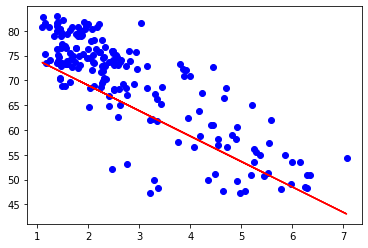

In [10]:
plt.plot(data[:,0], data[:,1], 'bo')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r')
plt.show()

# 2. Tensorflow Basic without Session(Eager API, v2.x)
- Defined-by-Run
- **Before run the bellow cell, restart the kernel(runtime)**

### Import TensorFlow

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf

### Eager Execution

In [2]:
a = tf.constant(3)
b = tf.constant(5)

print(a + b)

tf.Tensor(8, shape=(), dtype=int32)


In [3]:
mat_1 = tf.constant([[1,2], [3,4]])
mat_2 = tf.constant([[1,1], [1,1]])

print(tf.matmul(mat_1, mat_2))

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32)


### Example: Linear Regression with Keras

### Load the Birth-Life Dataset

In [4]:
path_to_file = tf.keras.utils.get_file('birth_life_2010.txt',
'https://github.com/uzay00/KaVe/raw/master/2018/Lecture9/tf%20code/birth_life_2010.txt')
data = pd.read_csv(path_to_file, sep="\t")
data.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [5]:
birth_rate = data["Birth rate"].values
life_exp = data["Life expectancy"].values

data = list(zip(birth_rate, life_exp))
data = np.asarray(data, dtype=np.float32)

data.shape

(190, 2)

### Build the model

In [6]:
# build a sequential model
layers = tf.keras.layers

model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])

In [7]:
# config the model
optimizer = tf.keras.optimizers.SGD(0.01)
model.compile(loss="mse", optimizer=optimizer)


### Train the model

In [8]:
# train the model
model.fit(birth_rate, life_exp,epochs=20, batch_size=1)

Epoch 1/20
190/190 [==============================] - 0s 668us/step - loss: 891.6608
Epoch 2/20
190/190 [==============================] - 0s 663us/step - loss: 234.3005
Epoch 3/20
190/190 [==============================] - 0s 653us/step - loss: 82.6530
Epoch 4/20
190/190 [==============================] - 0s 684us/step - loss: 47.8159
Epoch 5/20
190/190 [==============================] - 0s 663us/step - loss: 36.5218
Epoch 6/20
190/190 [==============================] - 0s 653us/step - loss: 34.2374
Epoch 7/20
190/190 [==============================] - 0s 653us/step - loss: 37.4840
Epoch 8/20
190/190 [==============================] - 0s 647us/step - loss: 34.7024
Epoch 9/20
190/190 [==============================] - 0s 668us/step - loss: 34.1469
Epoch 10/20
190/190 [==============================] - 0s 668us/step - loss: 35.7473
Epoch 11/20
190/190 [==============================] - 0s 668us/step - loss: 35.1835
Epoch 12/20
190/190 [==============================] - 0s 668us/step - l

### Plot the result

In [9]:
w_out = model.layers[0].kernel[0]
b_out = model.layers[0].bias


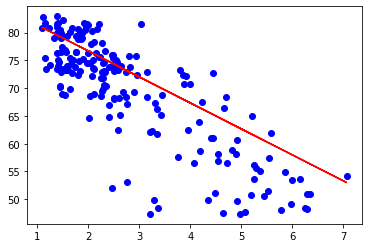

In [10]:
plt.plot(data[:,0], data[:,1], 'bo')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r')
plt.show()

# 3. Image Classification using Deep NN with Keras (Sequential API)

### Import TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load and prepare the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

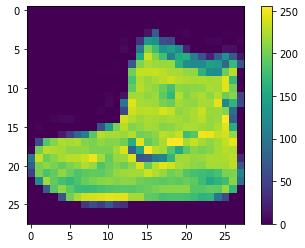

In [3]:
# show the image data 0
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [4]:
# scaling X
X_train, X_test = X_train / 255.0, X_test/ 255.0

In [5]:
# class labels
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
# names for class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Ankle boot'

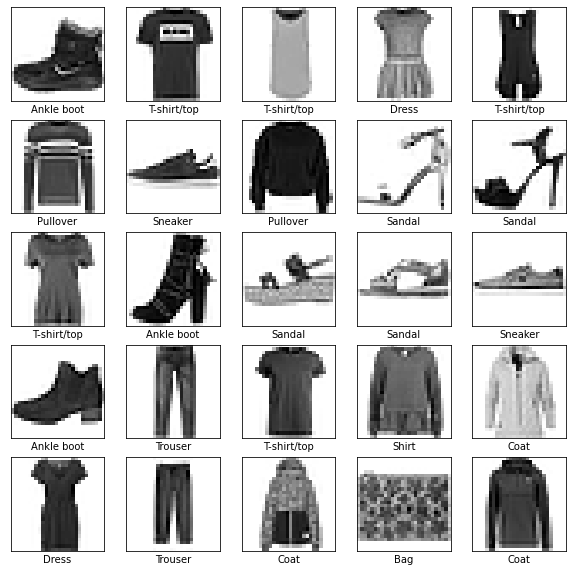

In [7]:
# show first 25 data and label
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### **[Recap]** : Scikit-learn Multi-layer Perceptron

In [8]:
from sklearn.neural_network import MLPClassifier

# build the model with 2 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(128,128), activation="relu", verbose=1,max_iter=20)

In [9]:
# flatten the data
X_train_1d = X_train.reshape(60000,784)
X_test_1d = X_test.reshape(10000,784)

In [10]:
# checking the execution time
import time
start_time = time.time()

# training the model
mlp.fit(X_train_1d, y_train)

print("Time : ", time.time()-start_time)

Iteration 1, loss = 0.56817003
Iteration 2, loss = 0.39415452
Iteration 3, loss = 0.35314265
Iteration 4, loss = 0.32406094
Iteration 5, loss = 0.30634438
Iteration 6, loss = 0.28988488
Iteration 7, loss = 0.27706845
Iteration 8, loss = 0.26546462
Iteration 9, loss = 0.25706568
Iteration 10, loss = 0.25075959
Iteration 11, loss = 0.23872227
Iteration 12, loss = 0.22961040
Iteration 13, loss = 0.22382528
Iteration 14, loss = 0.21867360
Iteration 15, loss = 0.21331748
Iteration 16, loss = 0.20312809
Iteration 17, loss = 0.20152854
Iteration 18, loss = 0.19232250
Iteration 19, loss = 0.18923741
Iteration 20, loss = 0.18341644
Time :  25.9955837726593
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# Train accuracy
mlp.score(X_train_1d, y_train)

0.9377833333333333

In [12]:
# Test accuracy
mlp.score(X_test_1d, y_test)


0.8929

### Build the Deep Neural Network model 
Build the model by using `tf.keras.Sequential` API

In [13]:
# build the model with 3 fully connected layer
layers = tf.keras.layers

model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Complie and Train the model
Choose an optimizer and loss function for training

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
# Checking the execution time
start_time = time.time()

# Training the model

model.fit(X_train,y_train, epochs=20, batch_size=200)

print("Time : ", time.time()-start_time)

Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 0.5621 - accuracy: 0.8057
Epoch 2/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3935 - accuracy: 0.8602
Epoch 3/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8726
Epoch 4/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8797
Epoch 5/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8871
Epoch 6/20
300/300 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8923
Epoch 7/20
300/300 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8975
Epoch 8/20
300/300 [==============================] - 0s 1ms/step - loss: 0.2705 - accuracy: 0.9012
Epoch 9/20
300/300 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.9028
Epoch 10/20
300/300 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.9061

### **[Note] Advantage of using GPU**
>- **TensorFlow can process large batch sizes quickly through parallel computation using GPUs, so it is much faster than Scikit-learn**  
- Training time : TensorFlow <<< Scikit-learn

### Evaluate the model

In [16]:
loss, acc = model.evaluate(X_test,y_test)
print('Test Loss : %.4f' % loss)
print('Test Accuracy : %.4f' % acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8928
Test Loss : 0.3308
Test Accuracy : 0.8928


### Make prediction

In [17]:
predictions = model.predict(X_test)
predictions

array([[4.8033633e-07, 9.4132240e-09, 2.8953971e-07, ..., 6.6066296e-03,
        2.3964755e-09, 9.9303705e-01],
       [8.2083770e-06, 4.4443727e-13, 9.9935120e-01, ..., 1.1344844e-15,
        4.7055801e-12, 1.0350469e-14],
       [1.2464207e-11, 1.0000000e+00, 6.6283856e-15, ..., 1.2316915e-24,
        1.1629534e-15, 3.1441598e-21],
       ...,
       [2.4009634e-07, 5.4956961e-13, 1.4933839e-06, ..., 1.5084095e-09,
        9.9999237e-01, 2.5782152e-12],
       [2.9541893e-09, 9.9999976e-01, 2.3540800e-10, ..., 3.1048938e-16,
        2.1654480e-10, 6.1764948e-15],
       [2.4166875e-08, 2.8945246e-13, 5.7726868e-10, ..., 6.4415042e-07,
        3.5853702e-09, 4.8628890e-10]], dtype=float32)

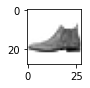

In [18]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

In [19]:
y_predicts = np.argmax(predictions[0])
print('True lable = %s' % class_names[y_test[0]])
print('Predicted = %s' % class_names[y_predicts])

True lable = Ankle boot
Predicted = Ankle boot


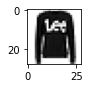

In [20]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[1], cmap=plt.cm.binary)
plt.show()

In [21]:
y_predicts = np.argmax(predictions[1])
print('True lable = %s' % class_names[y_test[1]])
print('Predicted = %s' % class_names[y_predicts])

True lable = Pullover
Predicted = Pullover


# 4. Image Classification using Deep NN with Keras(Subclassing API)

### Import Tensorflow

In [22]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

### Load and prepare the Fashion MNIST dataset

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0


## DataLoader : Load numpy array

In [24]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)).shuffle(10000).batch(200)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(200)

## Build the Neural Networks model
Build the model by using `tf.keras.Model` API (subclassing API)

In [25]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(128, activation='relu')
        self.d3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

model = MyModel()

## Select the loss function and the optimizer

In [26]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(0.001)

## Select metrics to measure the loss and the accuracy of the model

In [27]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

## Define train step
- Use tf.GradientTape to train the model

In [28]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

## Define test step
- No gradient update

In [29]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

## Train the model

In [30]:
EPOCHS = 20

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch: {}, Loss: {}, Train Accuracy: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch: 1, Loss: 0.5709829926490784, Train Accuracy: 80.26166534423828, Test Accuracy: 84.1300048828125
Epoch: 2, Loss: 0.4847846031188965, Train Accuracy: 83.06082916259766, Test Accuracy: 84.7699966430664
Epoch: 3, Loss: 0.4407566785812378, Train Accuracy: 84.51000213623047, Test Accuracy: 85.02333068847656
Epoch: 4, Loss: 0.41228532791137695, Train Accuracy: 85.41374969482422, Test Accuracy: 85.44499969482422
Epoch: 5, Loss: 0.3916088342666626, Train Accuracy: 86.06766510009766, Test Accuracy: 85.8460

# 5. Overfitting & Underfitting

## Import tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load the IMDb Dataset

In [ ]:
NUM_WORDS = 3000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Multi-hot Encoding

In [ ]:
def multi_hot_encoding(seq, dims):
    results = np.zeros((len(seq), dims))

    for i, word_indices in enumerate(seq):
        results[i, word_indices] = 1.0
    
    return results

X_train = multi_hot_encoding(X_train, dims=NUM_WORDS)
X_test = multi_hot_encoding(X_test, dims=NUM_WORDS)

%matplotlib inline
print(X_train[0])
plt.plot(X_train[0])

## A Baseline Model


In [54]:
layers = tf.keras.layers

baseline_model = tf.keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(NUM_WORDS,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

baseline_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "binary_crossentropy"])

baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                48016     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 48,305
Trainable params: 48,305
Non-trainable params: 0
_________________________________________________________________


In [56]:
baseline_history = baseline_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test,y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.5372 - acc: 0.7604 - binary_crossentropy: 0.5372 - val_loss: 0.3722 - val_acc: 0.8576 - val_binary_crossentropy: 0.3722
Epoch 2/20
25000/25000 - 1s - loss: 0.3024 - acc: 0.8852 - binary_crossentropy: 0.3024 - val_loss: 0.3003 - val_acc: 0.8781 - val_binary_crossentropy: 0.3003
Epoch 3/20
25000/25000 - 1s - loss: 0.2476 - acc: 0.9058 - binary_crossentropy: 0.2476 - val_loss: 0.2921 - val_acc: 0.8789 - val_binary_crossentropy: 0.2921
Epoch 4/20
25000/25000 - 1s - loss: 0.2277 - acc: 0.9126 - binary_crossentropy: 0.2277 - val_loss: 0.2989 - val_acc: 0.8770 - val_binary_crossentropy: 0.2989
Epoch 5/20
25000/25000 - 1s - loss: 0.2201 - acc: 0.9147 - binary_crossentropy: 0.2201 - val_loss: 0.3183 - val_acc: 0.8730 - val_binary_crossentropy: 0.3183
Epoch 6/20
25000/25000 - 1s - loss: 0.2098 - acc: 0.9204 - binary_crossentropy: 0.2098 - val_loss: 0.3172 - val_acc: 0.8722 - val_binary_crossentropy: 0.3172
Ep

## A Smaller Model


In [61]:
smaller_model = tf.keras.Sequential([
    layers.Dense(4,activation="relu", input_shape=(NUM_WORDS,)),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

smaller_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "binary_crossentropy"])

smaller_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 4)                 12004     
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 12,029
Trainable params: 12,029
Non-trainable params: 0
_________________________________________________________________


In [62]:
smaller_history = smaller_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test,y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6409 - acc: 0.6468 - binary_crossentropy: 0.6409 - val_loss: 0.5525 - val_acc: 0.8144 - val_binary_crossentropy: 0.5525
Epoch 2/20
25000/25000 - 1s - loss: 0.4502 - acc: 0.8572 - binary_crossentropy: 0.4502 - val_loss: 0.3891 - val_acc: 0.8636 - val_binary_crossentropy: 0.3891
Epoch 3/20
25000/25000 - 1s - loss: 0.3296 - acc: 0.8854 - binary_crossentropy: 0.3296 - val_loss: 0.3249 - val_acc: 0.8758 - val_binary_crossentropy: 0.3249
Epoch 4/20
25000/25000 - 1s - loss: 0.2780 - acc: 0.8981 - binary_crossentropy: 0.2780 - val_loss: 0.3014 - val_acc: 0.8801 - val_binary_crossentropy: 0.3014
Epoch 5/20
25000/25000 - 1s - loss: 0.2521 - acc: 0.9050 - binary_crossentropy: 0.2521 - val_loss: 0.2948 - val_acc: 0.8791 - val_binary_crossentropy: 0.2948
Epoch 6/20
25000/25000 - 1s - loss: 0.2356 - acc: 0.9123 - binary_crossentropy: 0.2356 - val_loss: 0.2914 - val_acc: 0.8806 - val_binary_crossentropy: 0.2914
Ep

## Comparison models


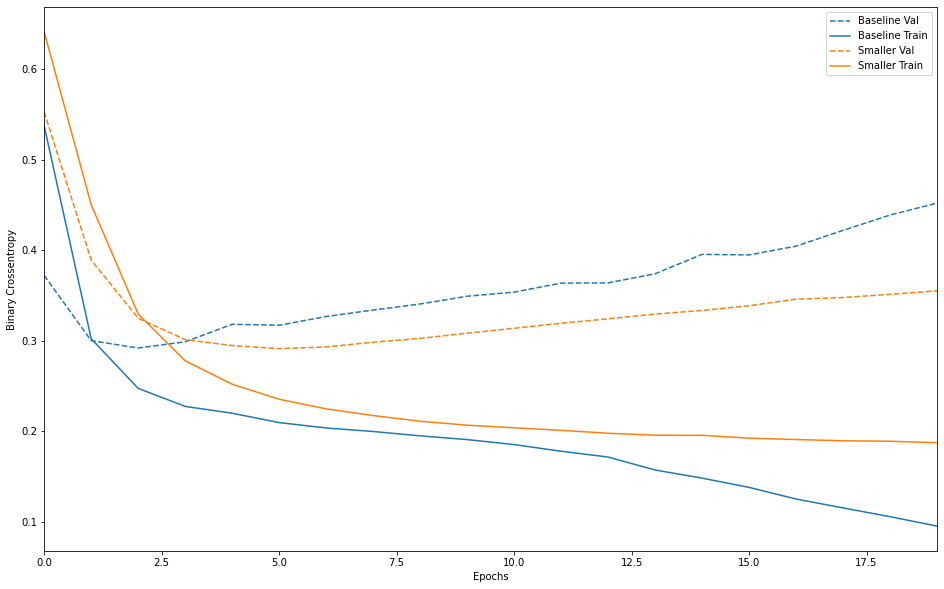

In [63]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history)])
#              ('bigger', bigger_history)])


## Avoiding Overfitting : L2 Regularization


In [64]:
l2_model = tf.keras.models.Sequential([
    layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                 activation="relu", input_shape=(NUM_WORDS,)),
    layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

l2_model.compile(optimizer="adam", loss="binary_crossentropy",
                metrics=["accuracy", "binary_crossentropy"])

l2_model_history = l2_model.fit(X_train,y_train, epochs=20, batch_size=512, validation_data=(X_test,y_test), verbose=2)

TypeError: ('Keyword argument not understood:', 'activaton')

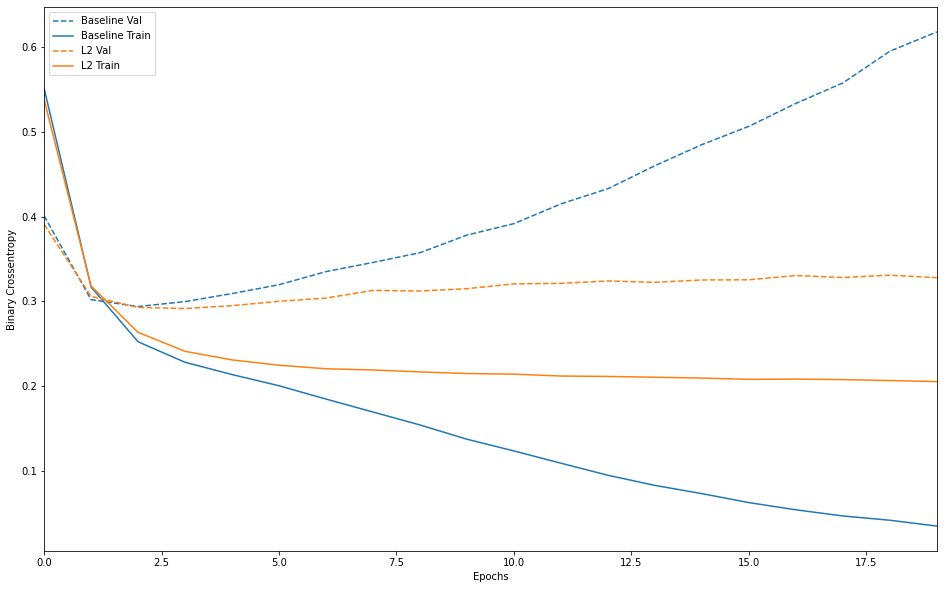

In [0]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

# Quiz : Build Neural Networks for image classification
- Dataset : CIFAR-10
- To do
  0. Build the Neural Networks with Scikit-learn
  1. Build the Neural Networks with Sequential API(`tf.keras.models.Sequential`)
  2. Build the Neural Networks with Subclasss API(`tf.keras.Model`)

## Import TensorFlow

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Load and prepare the CIFAR-10 dataset

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, x_test = X_train / 255.0, X_test / 255.0

In [0]:
X_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

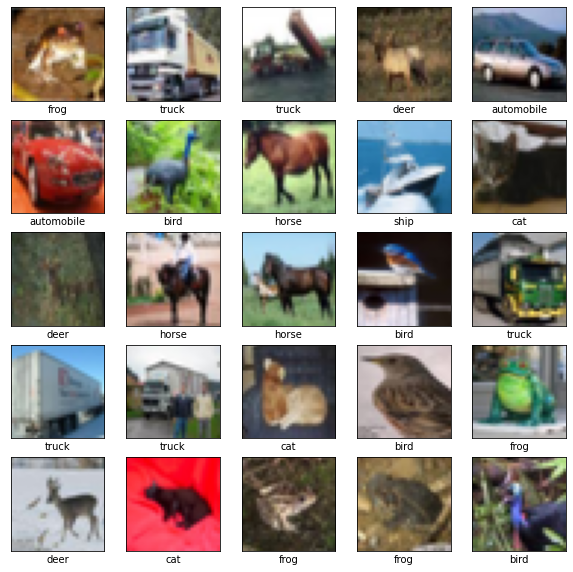

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 0. Build the model with Scikit-learn


In [0]:
# Flatten the data
X_train_1d = X_train.reshape(50000, 32*32*3)
X_test_1d = X_test.reshape(10000, 32*32*3)

In [0]:
# Fill in the blnak : Build the model with Scikit-learn 







In [0]:
# Checking the execution time
import time
start_time = time.time()
None
print("Time : ", time.time()-start_time)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2.33362301
Iteration 2, loss = 2.31320293
Iteration 3, loss = 2.30614769
Iteration 4, loss = 2.30368392
Iteration 5, loss = 2.30294129
Iteration 6, loss = 2.30277503
Iteration 7, loss = 2.30272145
Iteration 8, loss = 2.30270685
Iteration 9, loss = 2.30270984
Iteration 10, loss = 2.30270199
Iteration 11, loss = 2.30270796
Iteration 12, loss = 2.30271444
Iteration 13, loss = 2.30271456
Iteration 14, loss = 2.30271546
Iteration 15, loss = 2.30270600
Iteration 16, loss = 2.30270331
Iteration 17, loss = 2.30269793
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Time :  72.30770611763


In [0]:
mlp.score(X_train_1d, y_train)

0.1

In [0]:
mlp.score(X_test_1d, y_test)

0.1

## 1. Build the model with Sequential API(`tf.keras.models.Sequential`)

In [0]:
# Fill in the blnak : Build & Compile the model Sequential API










Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train the model 
baseline_history = None

# Evaulate the model : hint : use '.evaluate()' method
None

Epoch 1/20
196/196 [==============================] - 1s 4ms/step - loss: 2.0274 - accuracy: 0.2750 - val_loss: 165.4251 - val_accuracy: 0.3176
Epoch 2/20
196/196 [==============================] - 1s 4ms/step - loss: 1.8370 - accuracy: 0.3488 - val_loss: 165.9108 - val_accuracy: 0.3503
Epoch 3/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7817 - accuracy: 0.3739 - val_loss: 174.3137 - val_accuracy: 0.3488
Epoch 4/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7524 - accuracy: 0.3851 - val_loss: 162.2017 - val_accuracy: 0.3896
Epoch 5/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7264 - accuracy: 0.3968 - val_loss: 172.7870 - val_accuracy: 0.3806
Epoch 6/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7147 - accuracy: 0.3973 - val_loss: 166.3523 - val_accuracy: 0.3923
Epoch 7/20
196/196 [==============================] - 1s 4ms/step - loss: 1.6912 - accuracy: 0.4094 - val_loss: 170.7604 - val_accuracy:

[195.12124633789062, 0.39430001378059387]

## 2. Build the model with Subclasss API(`tf.keras.Model`)

In [0]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

In [0]:
# Make DataLoader using tf.data.Dataset.from_tensor_slices()
train_ds = None
test_ds = None

In [0]:
# Fill in the blnak : Build  the model by subclassing tf.keras.Model API









#################################################
model = # your Neural Networks class name e.g. MyModel()

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
EPOCHS = 20

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch: {}, Train Loss: {}, Train Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch: 1, Train Loss: 1.9150220155715942, Train Accuracy: 31.38800048828125, Test Loss: 177.2480010986328, Test Accuracy: 34.4900016784668
Epoch: 2, Train Loss: 1.8360271453857422, Train Accuracy: 34.218997955322266, Test Loss: 170.81422424316406, Test Accuracy: 35.94499969482422
Epoch: 3, Train Loss: 1.7906724214553833, Train Accuracy: 35.882667541503906, Test Loss: 170.3977813720703, Test Accuracy: 36.81333541870117
Epoch: 4, Train Loss: 1.7599208354949951, Train Accuracy: 37.06449890136719, Test Loss